In [14]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [15]:
import torch
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Create a csv file containing the image and mask paths

In [16]:
import os
images  = os.listdir('/kaggle/input/plant-semantic-segmentation/Plant segmentation/images')
images.sort()
images[:10]

['T02_Box007_2017-09-04T07-12-53-482.png',
 'T02_Box007_2017-09-04T10-46-12-638.png',
 'T02_Box007_2017-09-04T13-12-49-447.png',
 'T02_Box007_2017-09-05T09-21-20-473.png',
 'T02_Box007_2017-09-06T10-42-48-553.png',
 'T02_Box007_2017-09-07T10-49-33-224.png',
 'T02_Box007_2017-09-09T08-52-40-045.png',
 'T02_Box007_2017-09-10T05-55-35-248.png',
 'T02_Box007_2017-09-11T10-38-11-116.png',
 'T02_Box007_2017-09-12T09-15-11-694.png']

In [17]:
masks = os.listdir('/kaggle/input/plant-semantic-segmentation/Plant segmentation/masks')
masks.sort()
masks[:10]

['T02_Box007_2017-09-04T07-12-53-482.png',
 'T02_Box007_2017-09-04T10-46-12-638.png',
 'T02_Box007_2017-09-04T13-12-49-447.png',
 'T02_Box007_2017-09-05T09-21-20-473.png',
 'T02_Box007_2017-09-06T10-42-48-553.png',
 'T02_Box007_2017-09-07T10-49-33-224.png',
 'T02_Box007_2017-09-09T08-52-40-045.png',
 'T02_Box007_2017-09-10T05-55-35-248.png',
 'T02_Box007_2017-09-11T10-38-11-116.png',
 'T02_Box007_2017-09-12T09-15-11-694.png']

In [18]:
import pandas as pd

col = {'images':images,'masks': masks}
df = pd.DataFrame(col)
df.to_csv('/kaggle/working/metadata.csv')

In [19]:
df.head()

,images,masks
0,T02_Box007_2017-09-04T07-12-53-482.png,T02_Box007_2017-09-04T07-12-53-482.png
1,T02_Box007_2017-09-04T10-46-12-638.png,T02_Box007_2017-09-04T10-46-12-638.png
2,T02_Box007_2017-09-04T13-12-49-447.png,T02_Box007_2017-09-04T13-12-49-447.png
3,T02_Box007_2017-09-05T09-21-20-473.png,T02_Box007_2017-09-05T09-21-20-473.png
4,T02_Box007_2017-09-06T10-42-48-553.png,T02_Box007_2017-09-06T10-42-48-553.png


In [20]:
df['images'] = '/kaggle/input/plant-semantic-segmentation/Plant segmentation/images/' + df['images']
df['masks'] = '/kaggle/input/plant-semantic-segmentation/Plant segmentation/masks/' + df['masks']

In [21]:
df.head()

,images,masks
0,/kaggle/input/plant-semantic-segmentation/Plan...,/kaggle/input/plant-semantic-segmentation/Plan...
1,/kaggle/input/plant-semantic-segmentation/Plan...,/kaggle/input/plant-semantic-segmentation/Plan...
2,/kaggle/input/plant-semantic-segmentation/Plan...,/kaggle/input/plant-semantic-segmentation/Plan...
3,/kaggle/input/plant-semantic-segmentation/Plan...,/kaggle/input/plant-semantic-segmentation/Plan...
4,/kaggle/input/plant-semantic-segmentation/Plan...,/kaggle/input/plant-semantic-segmentation/Plan...


In [22]:
df.shape

(144, 2)

In [23]:
df.iloc[4][1]

'/kaggle/input/plant-semantic-segmentation/Plant segmentation/masks/T02_Box007_2017-09-06T10-42-48-553.png'

# Plot some random image

(-0.5, 4095.5, 2999.5, -0.5)

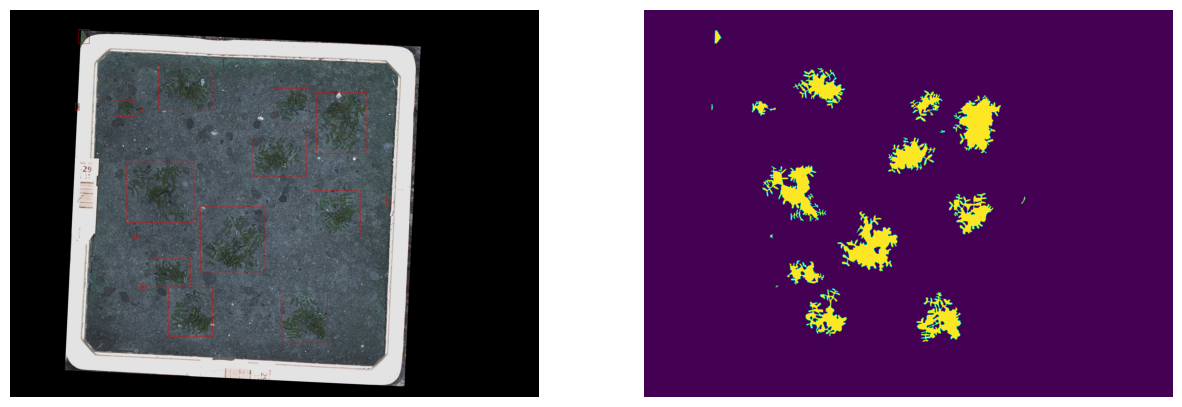

In [24]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,15))

index = random.randint(0,len(images))
img = cv2.imread(df.iloc[index][0])
msk = cv2.imread(df.iloc[index][1])
msk = cv2.cvtColor(msk, cv2.COLOR_BGR2GRAY)
msk = np.expand_dims(msk, axis=-1)

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(msk)
plt.axis(False)

In [25]:
img.shape

(3000, 4096, 3)

In [26]:
msk.shape

(3000, 4096, 1)

# Data Augmentation

#### Without creating a function, just to visualize how it is being done..🙃

In [27]:
import albumentations as A

IMG_SIZE = 256

train_augmented = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE),
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.2),
    A.VerticalFlip(p = 0.2),
    A.RandomBrightnessContrast(p=0.2),
    A.RandomRotate90(p=0.2)
])

val_augmented = A.Compose([
    A.Resize(IMG_SIZE, IMG_SIZE)
])

In [28]:
sample_idx = random.randint(0,len(images))

sample_img = df.iloc[sample_idx][0]
sample_img = cv2.imread(sample_img)

sample_msk = df.iloc[sample_idx][1]
sample_msk = cv2.imread(sample_msk, cv2.IMREAD_GRAYSCALE)
sample_msk = np.expand_dims(sample_msk, axis=-1)

In [29]:
transformed = train_augmented(image = sample_img,
                              mask = sample_msk)

print(transformed['image'].shape)
print(transformed['mask'].shape)

(256, 256, 3)
(256, 256, 1)


(-0.5, 255.5, 255.5, -0.5)

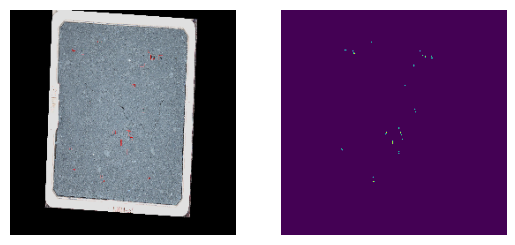

In [30]:
plt.subplot(1,2,1)
plt.imshow(transformed['image'])
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(transformed['mask'])
plt.axis(False)

# Data Augmentation

#### Creating functions for train and validation data augmentations

In [31]:
def train_augmentations():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE),
        A.RandomCrop(width=256, height=256),
        A.HorizontalFlip(p=0.2),
        A.VerticalFlip(p = 0.2),
        A.RandomBrightnessContrast(p=0.2),
        A.RandomRotate90(p=0.2)
    ])

def val_augmentations():
    return A.Compose([
        A.Resize(IMG_SIZE, IMG_SIZE)
    ])

# Create a custom dataset

In [32]:
from torch.utils.data import Dataset

class PlantSegmentationDataset(Dataset):
    
    def __init__(self, df, transform = False):
        self.df = df
        self.transform = transform
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        row =  self.df.iloc[index]
        
        image_path = row[0]
        mask_path = row[1]
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = np.expand_dims(mask, axis=-1)
        
        if self.transform:
            data = self.transform(image = image, mask = mask)
            image = data['image']
            mask = data['mask']
            
        image = np.transpose(image, (2,0,1)).astype(np.float32)
        mask = np.transpose(mask, (2,0,1)).astype(np.float32)
        
        image = torch.Tensor(image) / 255.
        mask = torch.round(torch.Tensor(mask) / 255.)
        
        return image, mask
            

# Split into Train-Val datasets

In [33]:
from sklearn.model_selection import train_test_split
train_dataset, valid_dataset = train_test_split(df, test_size=0.2, random_state=42)

In [34]:
train_dataset.shape, valid_dataset.shape

((115, 2), (29, 2))

In [35]:
train_dataset = PlantSegmentationDataset(train_dataset, train_augmentations())
valid_dataset = PlantSegmentationDataset(valid_dataset, val_augmentations())

In [36]:
len(train_dataset), len(valid_dataset)

(115, 29)

In [37]:
import random

index = random.randint(0,len(train_dataset))
image, mask = train_dataset[index]
image.shape, mask.shape

(torch.Size([3, 256, 256]), torch.Size([1, 256, 256]))

In [38]:
image = image.permute(1,2,0)
mask = mask.permute(1,2,0)

In [39]:
mask.shape, image.shape

(torch.Size([256, 256, 1]), torch.Size([256, 256, 3]))

(-0.5, 255.5, 255.5, -0.5)

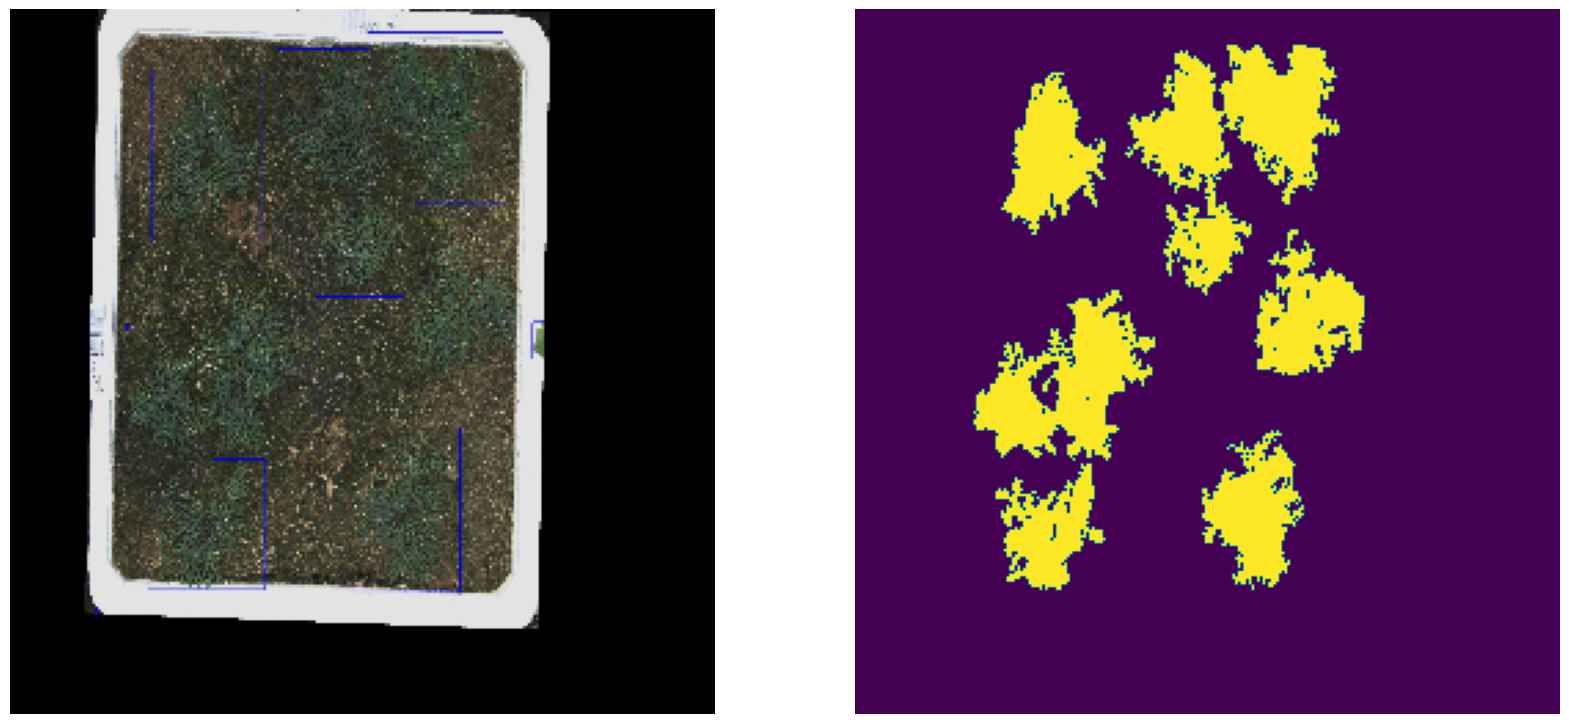

In [40]:
plt.figure(figsize = (20,20))
plt.subplot(1,2,1)
plt.imshow(image)
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow(mask)
plt.axis(False)

# Creating Training and Validation DataLoaders

In [41]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16

train_dataloader = DataLoader(dataset = train_dataset,
                             batch_size = BATCH_SIZE,
                              shuffle = True)

valid_dataloader = DataLoader(dataset = valid_dataset,
                              batch_size = BATCH_SIZE,
                               shuffle = False)

In [42]:
len(train_dataloader), len(valid_dataloader)

(8, 2)

In [43]:
img, msk = next(iter(train_dataloader))

In [44]:
img.shape, msk.shape

(torch.Size([16, 3, 256, 256]), torch.Size([16, 1, 256, 256]))

# Creating Segmentation Model

In [45]:
pip install -U git+https://github.com/qubvel/segmentation_models.pytorch;

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-2oeanco1
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-2oeanco1
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 963.9 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.9 MB/s eta 0:00:0000:0100:01
  Created wheel for segmentation_models_pytorch: filename=segmentation_models_pytorch-0.3.3-py3-none-any.whl size=106723 sha256=9557634a6969e18f321f3dd0fc53fb2639f78b8e26bc328aa57

In [46]:
import segmentation_models_pytorch as smp
from torch import nn

class PlantSegmentationModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.architecture = smp.FPN(
            encoder_name = 'tu-efficientnet_b0',
            encoder_weights = 'imagenet',
            in_channels = 3,
            classes = 1,
            activation = None   
        )
        
    def forward(self, images, masks = None):
        logits = self.architecture(images)
        
        if (masks is not None):
            #print("Logits shape:", logits.shape)
            #print("Masks shape:", masks.shape)
            
            assert logits.shape == masks.shape, "Shapes of logits and masks must match"
            
            loss1 = smp.losses.DiceLoss(mode='binary')(logits,masks)
            loss2 = nn.BCEWithLogitsLoss()(logits,masks)
            
            return logits, loss1+loss2
        
        return logits

In [47]:
model = PlantSegmentationModel()
model.to(device);

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

# Creating Train and Validation functions

In [48]:
def train_fn(dataloader,model,optimizer):
    
    model.train()
    total_loss = 0.0
    for images,masks in tqdm(dataloader):
        images = images.to(device)
        masks = masks.to(device)
        
        optimizer.zero_grad()
        
        logits,loss = model(images,masks)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item() #Tensor to number : [5] to 5
        
    return total_loss/len(dataloader) #Average loss
    

In [49]:
def valid_fn(dataloader, model):
    
    model.eval()
    total_loss = 0.0
    with torch.inference_mode():
        for images, masks in tqdm(dataloader):
            images = images.to(device)
            masks = masks.to(device)
            
            #print("Images shape after transfer:", images.shape)  # Added print statement
            #print("Masks shape after transfer:", masks.shape)  # Added print statement
            
            logits,loss = model(images,masks)
            total_loss += loss.item() 
            
    return total_loss/len(dataloader)


In [50]:
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.001)

# Training the model

In [51]:
epochs = 40
best_valid_loss = np.Inf

for epoch in range(epochs):
    
    train_loss = train_fn(train_dataloader, model, optimizer)
    valid_loss = valid_fn(valid_dataloader, model)
    
    if(valid_loss < best_valid_loss):
        best_valid_loss = valid_loss
        torch.save(model.state_dict(),'best_model.pt')
        print("The model is saved")
        
    print(f"Epoch: {epoch+1} | Training loss: {train_loss} | Validation loss: {valid_loss}")

100%|██████████| 2/2 [00:14<00:00,  7.33s/it]


The model is saved
Epoch: 1 | Training loss: 1.238539308309555 | Validation loss: 1.3357799649238586


100%|██████████| 2/2 [00:13<00:00,  6.90s/it]


The model is saved
Epoch: 2 | Training loss: 0.5380310267210007 | Validation loss: 1.2505120038986206


100%|██████████| 2/2 [00:13<00:00,  6.71s/it]


The model is saved
Epoch: 3 | Training loss: 0.48190367966890335 | Validation loss: 1.0341418981552124


100%|██████████| 2/2 [00:13<00:00,  6.91s/it]


The model is saved
Epoch: 4 | Training loss: 0.4344116449356079 | Validation loss: 0.7558773159980774


100%|██████████| 2/2 [00:13<00:00,  6.69s/it]


The model is saved
Epoch: 5 | Training loss: 0.4203576557338238 | Validation loss: 0.7333699464797974


100%|██████████| 2/2 [00:13<00:00,  6.99s/it]


The model is saved
Epoch: 6 | Training loss: 0.42227889597415924 | Validation loss: 0.5072707831859589


100%|██████████| 2/2 [00:13<00:00,  6.70s/it]


The model is saved
Epoch: 7 | Training loss: 0.37983448430895805 | Validation loss: 0.4539899230003357


100%|██████████| 2/2 [00:13<00:00,  6.95s/it]


The model is saved
Epoch: 8 | Training loss: 0.4099097363650799 | Validation loss: 0.4273340553045273


100%|██████████| 2/2 [00:13<00:00,  6.75s/it]


The model is saved
Epoch: 9 | Training loss: 0.4188026823103428 | Validation loss: 0.4195273518562317


100%|██████████| 2/2 [00:13<00:00,  6.64s/it]


Epoch: 10 | Training loss: 0.3861231803894043 | Validation loss: 0.42881907522678375


100%|██████████| 2/2 [00:13<00:00,  6.68s/it]


The model is saved
Epoch: 11 | Training loss: 0.3907683566212654 | Validation loss: 0.4095456004142761


100%|██████████| 2/2 [00:13<00:00,  6.69s/it]


The model is saved
Epoch: 12 | Training loss: 0.3740040473639965 | Validation loss: 0.4064304828643799


100%|██████████| 2/2 [00:13<00:00,  6.73s/it]


Epoch: 13 | Training loss: 0.4028272293508053 | Validation loss: 0.41108205914497375


100%|██████████| 2/2 [00:13<00:00,  6.76s/it]


Epoch: 14 | Training loss: 0.36031514778733253 | Validation loss: 0.40751345455646515


100%|██████████| 2/2 [00:13<00:00,  6.69s/it]


Epoch: 15 | Training loss: 0.3702837638556957 | Validation loss: 0.4158891588449478


100%|██████████| 2/2 [00:13<00:00,  6.74s/it]


The model is saved
Epoch: 16 | Training loss: 0.3715681619942188 | Validation loss: 0.39534731209278107


100%|██████████| 2/2 [00:13<00:00,  6.64s/it]


The model is saved
Epoch: 17 | Training loss: 0.34333935007452965 | Validation loss: 0.39079636335372925


100%|██████████| 2/2 [00:13<00:00,  6.65s/it]


The model is saved
Epoch: 18 | Training loss: 0.35554616525769234 | Validation loss: 0.3887016773223877


100%|██████████| 2/2 [00:13<00:00,  6.58s/it]


Epoch: 19 | Training loss: 0.3570376746356487 | Validation loss: 0.38898997008800507


100%|██████████| 2/2 [00:13<00:00,  6.76s/it]


Epoch: 20 | Training loss: 0.34175584465265274 | Validation loss: 0.39019572734832764


100%|██████████| 2/2 [00:13<00:00,  6.71s/it]


Epoch: 21 | Training loss: 0.35676594637334347 | Validation loss: 0.3894439786672592


100%|██████████| 2/2 [00:13<00:00,  6.70s/it]


The model is saved
Epoch: 22 | Training loss: 0.3382842689752579 | Validation loss: 0.38619518280029297


100%|██████████| 2/2 [00:13<00:00,  6.79s/it]


Epoch: 23 | Training loss: 0.35673850774765015 | Validation loss: 0.38745635747909546


100%|██████████| 2/2 [00:13<00:00,  6.77s/it]


The model is saved
Epoch: 24 | Training loss: 0.3591700978577137 | Validation loss: 0.3857428729534149


100%|██████████| 2/2 [00:13<00:00,  6.63s/it]


The model is saved
Epoch: 25 | Training loss: 0.36321666836738586 | Validation loss: 0.3850145936012268


100%|██████████| 2/2 [00:13<00:00,  6.71s/it]


Epoch: 26 | Training loss: 0.36278383806347847 | Validation loss: 0.3855883926153183


100%|██████████| 2/2 [00:13<00:00,  6.68s/it]


Epoch: 27 | Training loss: 0.35388462245464325 | Validation loss: 0.3907403200864792


100%|██████████| 2/2 [00:13<00:00,  6.76s/it]


The model is saved
Epoch: 28 | Training loss: 0.39138295873999596 | Validation loss: 0.3804423063993454


100%|██████████| 2/2 [00:13<00:00,  6.78s/it]


Epoch: 29 | Training loss: 0.35393689945340157 | Validation loss: 0.38282884657382965


100%|██████████| 2/2 [00:13<00:00,  6.74s/it]


Epoch: 30 | Training loss: 0.34489404410123825 | Validation loss: 0.38296303153038025


100%|██████████| 2/2 [00:13<00:00,  6.69s/it]


Epoch: 31 | Training loss: 0.3675078675150871 | Validation loss: 0.3822105973958969


100%|██████████| 2/2 [00:13<00:00,  6.73s/it]


Epoch: 32 | Training loss: 0.3328096717596054 | Validation loss: 0.38899895548820496


100%|██████████| 2/2 [00:13<00:00,  6.75s/it]


Epoch: 33 | Training loss: 0.33336079493165016 | Validation loss: 0.3805745244026184


100%|██████████| 2/2 [00:13<00:00,  6.84s/it]


The model is saved
Epoch: 34 | Training loss: 0.3351217620074749 | Validation loss: 0.3764883279800415


100%|██████████| 2/2 [00:13<00:00,  6.65s/it]


Epoch: 35 | Training loss: 0.34923766925930977 | Validation loss: 0.3882921189069748


100%|██████████| 2/2 [00:13<00:00,  6.81s/it]


The model is saved
Epoch: 36 | Training loss: 0.33180925622582436 | Validation loss: 0.3755806237459183


100%|██████████| 2/2 [00:13<00:00,  6.72s/it]


The model is saved
Epoch: 37 | Training loss: 0.3147296570241451 | Validation loss: 0.37473054230213165


100%|██████████| 2/2 [00:13<00:00,  6.95s/it]


Epoch: 38 | Training loss: 0.341099102050066 | Validation loss: 0.3953601121902466


100%|██████████| 2/2 [00:13<00:00,  6.79s/it]


Epoch: 39 | Training loss: 0.332639142870903 | Validation loss: 0.37754687666893005


100%|██████████| 2/2 [00:13<00:00,  6.77s/it]

The model is saved
Epoch: 40 | Training loss: 0.35541725531220436 | Validation loss: 0.37317831814289093


In [52]:
model.load_state_dict(torch.load('/kaggle/working/best_model.pt'))

<All keys matched successfully>

# Predicting for a sample image

In [57]:
index = random.randrange(0, len(valid_dataset))
image,mask = valid_dataset[index]
image = image.to(device)
logits_mask = model(image.unsqueeze(0)); # C,H,W -> 1,C,H,W
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask > 0.5) * 1.0

(-0.5, 255.5, 255.5, -0.5)

<Figure size 1000x1000 with 0 Axes>

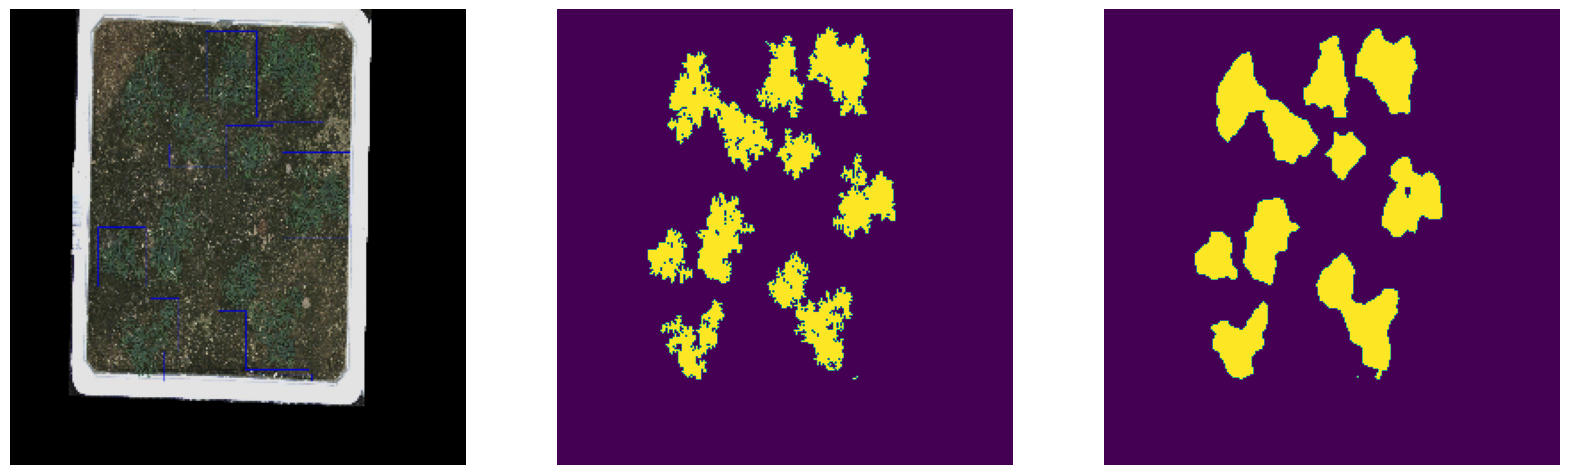

In [58]:
image = image.detach().cpu()
pred_mask = pred_mask.detach().cpu().squeeze(0)

plt.figure(figsize=(10,10))

image = image.permute(1,2,0)
mask = mask.permute(1,2,0)
pred_mask = pred_mask.permute(1,2,0)

plt.figure(figsize = (20,20))

plt.subplot(1,3,1)
plt.imshow(image)
plt.axis(False)

plt.subplot(1,3,2)
plt.imshow(mask)
plt.axis(False)

plt.subplot(1,3,3)
plt.imshow(pred_mask)
plt.axis(False)